## Load Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import re
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [2]:
df = pd.read_csv('./tic-tac-toe.data',header=None)

In [3]:
df.columns=['TL','TM','TR','ML','MM','MR','BL','BM','BM','RESULT']

In [4]:
df

,TL,TM,TR,ML,MM,MR,BL,BM,BM,RESULT
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BM      958 non-null    object
 9   RESULT  958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


In [6]:
df.isna().sum()

TL        0
TM        0
TR        0
ML        0
MM        0
MR        0
BL        0
BM        0
BM        0
RESULT    0
dtype: int64

In [7]:
X=df.drop('RESULT',axis=1)
Y=df['RESULT']

In [8]:
df_new=pd.get_dummies(X)

In [9]:
re_col=[]
for i in df_new.columns:
    if re.search('b$',i):
        re_col.append(i)

In [10]:
df_new.drop(re_col,axis=1,inplace=True)
df_new

,TL_o,TL_x,TM_o,TM_x,TR_o,TR_x,ML_o,ML_x,MM_o,MM_x,MR_o,MR_x,BL_o,BL_x,BM_o,BM_x,BM_o,BM_x
0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0
1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1
3,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0
4,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1
954,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1
955,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1
956,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1


In [11]:
encoder_output=LabelEncoder()
df_new['RESULT']=encoder_output.fit_transform(Y)

In [12]:
X=df_new.drop('RESULT',axis=1)
Y=df_new['RESULT']

In [13]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,random_state=42,
                                               test_size=0.2,stratify=Y)

In [14]:
para={'criterion':['gini','entropy'],'splitter':["best", "random"],'max_depth':range(2,15),'max_features':range(2,19)}

In [15]:
grid=GridSearchCV(DecisionTreeClassifier(),para,cv=10,scoring='accuracy')

In [16]:
grid.fit(train_x,train_y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 15),
                         'max_features': range(2, 19),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [17]:
grid.best_score_

0.9608509911141491

In [18]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 14,
 'splitter': 'best'}

In [19]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=9,max_features=15,random_state=42)

In [20]:
clf.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=9, max_features=15, random_state=42)

In [21]:
clf.score(test_x,test_y)

0.9322916666666666

In [22]:
cross_val_score(clf,train_x,train_y,cv=10).mean()

0.9425495557074506

In [23]:
p=clf.predict(test_x)

In [24]:
cm=confusion_matrix(p,test_y)

In [25]:
print(classification_report(p,test_y))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        62
           1       0.97      0.93      0.95       130

    accuracy                           0.93       192
   macro avg       0.92      0.93      0.92       192
weighted avg       0.93      0.93      0.93       192



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

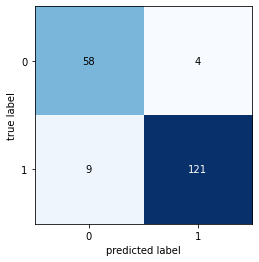

In [26]:
plot_confusion_matrix(cm)

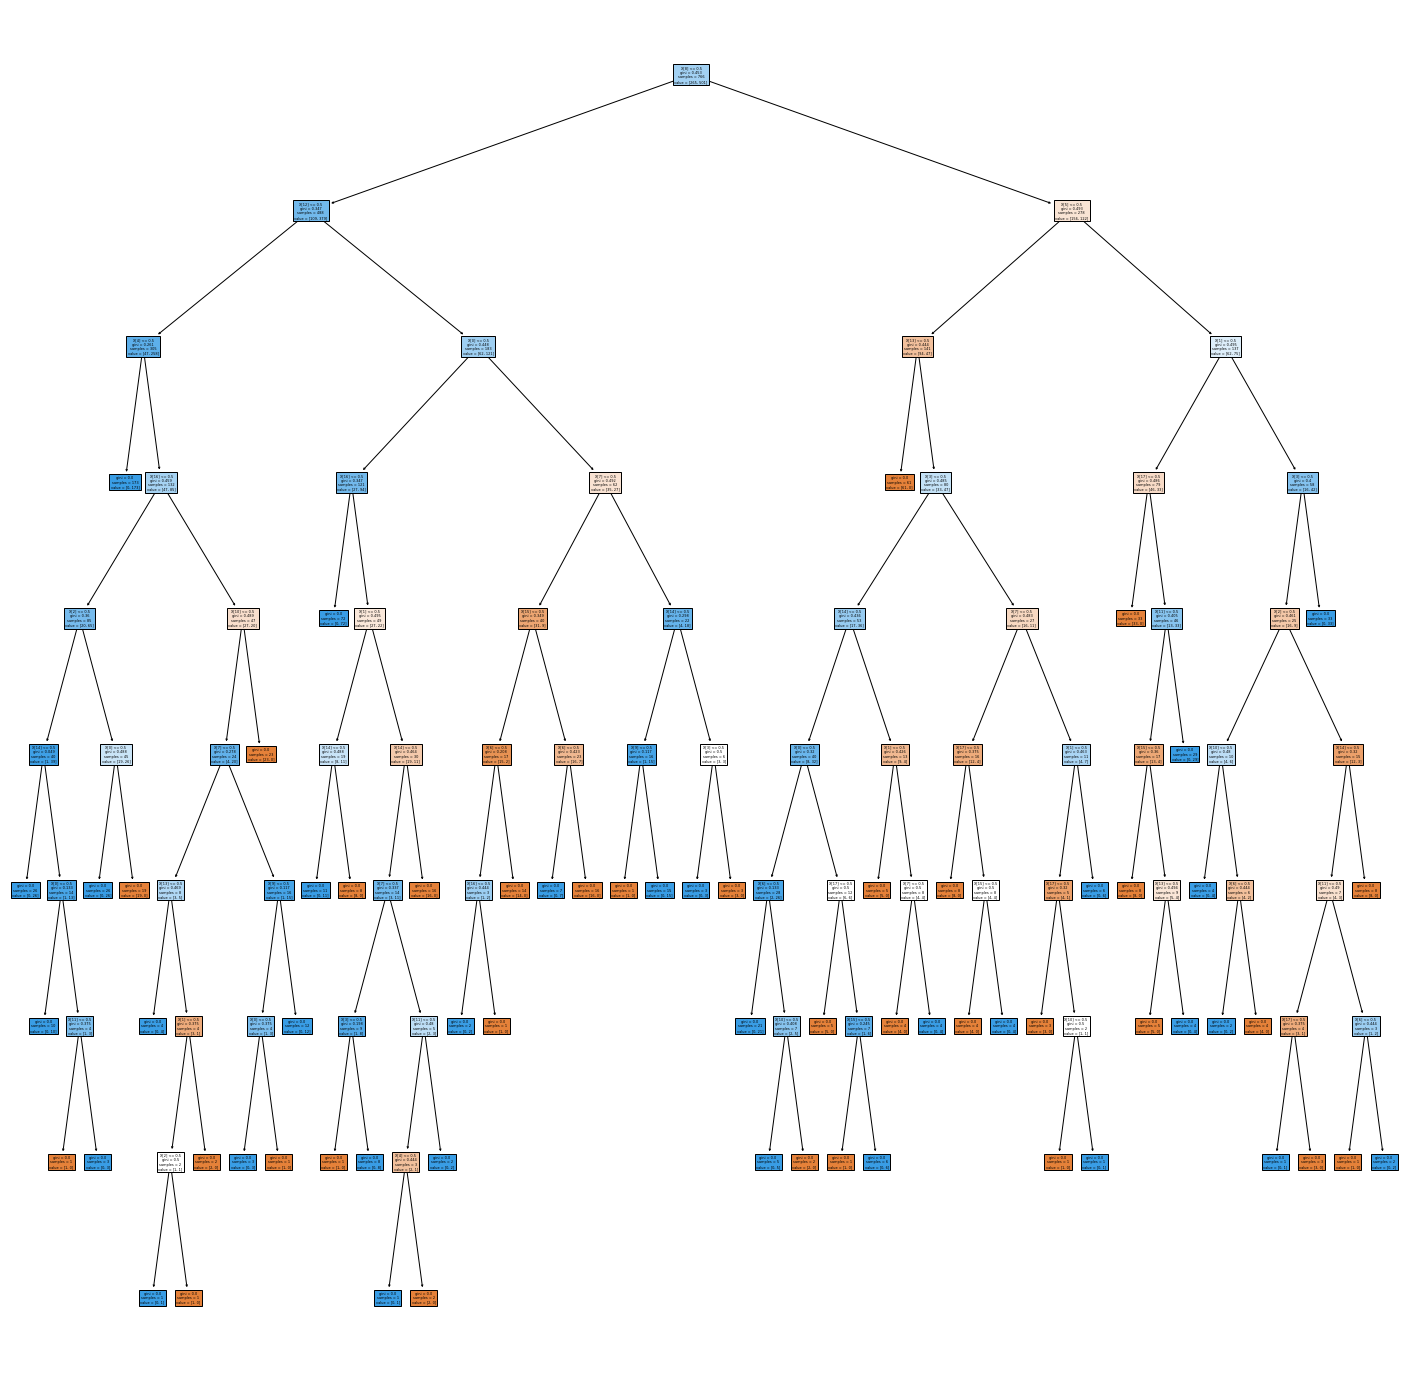

In [27]:
fig=plt.figure(figsize=(25,25))
plot_tree(clf,filled=True)
fig.savefig('Decision_tree.png')